<a href="https://colab.research.google.com/github/ViniciusFebasse/UBS/blob/main/ubs's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
df_ubs = pd.read_csv('ubs_localizacao.csv', sep=';')
df_ufs = pd.read_excel('ufs.xlsx')

In [92]:
df_ubs.sample(3)

,CNES,UF,IBGE,NOME,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE
17025,2694921,15,150730,UNIDADE DE SAUDE DA FAMILIA VI TABOCA,VILA TABOCA,TABOCA,"-6,09891","-52,24754"
13231,2498367,29,292200,PSF DE TAQUARINHA,ANTONIO CARLOS MAGALHAES,CENTRO,"-17,94081","-40,2396"
24027,5149843,28,280220,UNIDADE DE SAUDE DA FAMILIA DO POV MALHADA DO ...,POVOADO MALHADA DO PAU FERRO,ZONA RURAL,"-10,29955","-37,29824"


In [93]:
df_ubs.columns

Index(['CNES', 'UF', 'IBGE', 'NOME', 'LOGRADOURO', 'BAIRRO', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [94]:
colunas_ubs_excluir = ['CNES', 'IBGE']
for coluna in colunas_ubs_excluir:
  df_ubs.drop(coluna, axis=1, inplace=True)

In [95]:
df_ubs.columns

Index(['UF', 'NOME', 'LOGRADOURO', 'BAIRRO', 'LATITUDE', 'LONGITUDE'], dtype='object')

In [96]:
df_ufs.drop('nome', axis=1, inplace=True)
df_ufs.head(3)

,cod,uf
0,11,RO
1,12,AC
2,13,AM


In [97]:
df_ubs = df_ubs.join(df_ufs.set_index('cod'), on='UF')
df_ubs.drop('UF', axis=1, inplace=True)
df_ubs.sample(3)

,NOME,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE,uf
14212,POSTO DE SAUDE VICENTE GOMES,VARZEA DO COBRA,ZONA RURAL,"-5,13155","-38,06209",CE
25906,UBS ALECRIM,LOTEAMENTO COMANDATUBA,CENTRO,"-9,05214","-35,3926",AL
12704,UNIDADE PSF CAJAIBA,POVOADO CAJAIBA,RURAL,"-10,685","-37,425",SE


In [98]:
df_ubs.columns = ['nome', 'logradouro', 'bairro', 'latitude', 'longitude', 'uf']
df_ubs.sample(3)

,nome,logradouro,bairro,latitude,longitude,uf
16667,US JARBAS CYPRESTE DE SA JARDIM BOTANICO,RUA BAIXO GUANDU,JARDIM BOTANICO,"-20,38959","-40,37004",ES
3350,UBS 03 SAO JUDAS TADEU ITU,AVENIDA DOUTOR ULISSES DE MORAES,NUCLEO HABITACIONAL,"-23,28438","-47,27539",SP
30500,USF SAUDE EM ACAO,RUA OLIVIO DE MORAES MAGALHAES,GEISEL,"-7,18663","-34,8644",PB


In [99]:
reindexacao = ['nome', 'uf', 'logradouro', 'bairro', 'latitude', 'longitude',]

In [100]:
df_ubs = df_ubs.reindex(columns=reindexacao)
df_ubs.sample(3)

,nome,uf,logradouro,bairro,latitude,longitude
25155,USF VILA SAO GERALDO,PE,RUA PEDRO LEITE MONTEIRO,VILA SAO GERALDO,"-7,758","-40,27833"
5401,ESF IV ANTINHA,MG,RUA ROSA MARIA CAMELO LEAO,ZONA RURAL,"-19,356","-47,287"
25513,UAPS COLINA PARK,MG,RUA TENENTE REIS,COLINA PARK BOULEVAR,"-19,307","-48,924"


In [101]:
f"Existem hoje no Distrito Federal {df_ubs.nome[df_ubs.uf == 'DF'].count()} Unidades Básicas de Saúde"

'Existem hoje no Distrito Federal 203 Unidades Básicas de Saúde'

In [102]:
estados = list(df_ubs.uf.unique())
estados

['GO',
 'PE',
 'BA',
 'PR',
 'MG',
 'SE',
 'SP',
 'ES',
 'MA',
 'PA',
 'MS',
 'DF',
 'RJ',
 'RS',
 'SC',
 'PB',
 'RN',
 'CE',
 'AL',
 'MT',
 'AC',
 'TO',
 'RR',
 'AM',
 'PI',
 'RO',
 'AP']

In [103]:
for estado in estados:
  print(f"Existem hoje no {estado} {df_ubs.nome[df_ubs.uf == estado].count()} Unidades Básicas de Saúde")

Existem hoje no GO 1434 Unidades Básicas de Saúde
Existem hoje no PE 2590 Unidades Básicas de Saúde
Existem hoje no BA 3960 Unidades Básicas de Saúde
Existem hoje no PR 2115 Unidades Básicas de Saúde
Existem hoje no MG 5595 Unidades Básicas de Saúde
Existem hoje no SE 519 Unidades Básicas de Saúde
Existem hoje no SP 5383 Unidades Básicas de Saúde
Existem hoje no ES 882 Unidades Básicas de Saúde
Existem hoje no MA 2050 Unidades Básicas de Saúde
Existem hoje no PA 1570 Unidades Básicas de Saúde
Existem hoje no MS 652 Unidades Básicas de Saúde
Existem hoje no DF 203 Unidades Básicas de Saúde
Existem hoje no RJ 1992 Unidades Básicas de Saúde
Existem hoje no RS 2117 Unidades Básicas de Saúde
Existem hoje no SC 1779 Unidades Básicas de Saúde
Existem hoje no PB 1528 Unidades Básicas de Saúde
Existem hoje no RN 1018 Unidades Básicas de Saúde
Existem hoje no CE 2205 Unidades Básicas de Saúde
Existem hoje no AL 911 Unidades Básicas de Saúde
Existem hoje no MT 940 Unidades Básicas de Saúde
Existe

In [104]:
# Insira o nome de uma coluna no final do groupby para que os dados sejam agrupados somente por ela
serie_ubs_por_estado = df_ubs.groupby('uf').count().nome.sort_values(ascending=False)
serie_ubs_por_estado

uf
MG    5595
SP    5383
BA    3960
PE    2590
CE    2205
RS    2117
PR    2115
MA    2050
RJ    1992
SC    1779
PA    1570
PB    1528
GO    1434
PI    1102
RN    1018
MT     940
AL     911
ES     882
MS     652
AM     597
SE     519
TO     433
RO     292
AC     252
DF     203
RR     138
AP     132
Name: nome, dtype: int64

In [105]:
df_ubs_x_estado = pd.DataFrame(serie_ubs_por_estado).reset_index()
df_ubs_x_estado.sample(2)

,uf,nome
9,SC,1779
11,PB,1528


<BarContainer object of 27 artists>

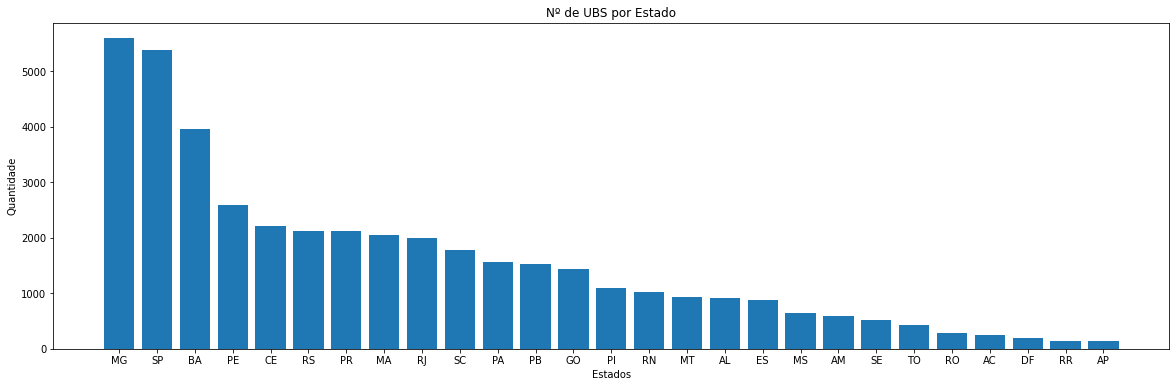

In [106]:
plt.figure(figsize=(20, 6))
plt.title('Nº de UBS por Estado')
plt.xlabel('Estados')
plt.ylabel('Quantidade')
plt.bar(x= df_ubs_x_estado.uf, height= df_ubs_x_estado.nome)

In [107]:
df_ubs.latitude = df_ubs.latitude.replace(np.nan, 0)
df_ubs.longitude = df_ubs.longitude.replace(np.nan, 0)

In [108]:
df_ubs.latitude = df_ubs.latitude.astype('str')
df_ubs.longitude = df_ubs.longitude.astype('str')

In [109]:
para_float = lambda x: x.replace(",", ".")

In [110]:
df_ubs.latitude = df_ubs.latitude.apply(para_float)
df_ubs.longitude = df_ubs.longitude.apply(para_float)

In [111]:
df_ubs.latitude = df_ubs.latitude.astype('float16')
df_ubs.longitude = df_ubs.longitude.astype('float16')

In [112]:
df_ubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42389 entries, 0 to 42388
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nome        42389 non-null  object 
 1   uf          42389 non-null  object 
 2   logradouro  42389 non-null  object 
 3   bairro      42389 non-null  object 
 4   latitude    42389 non-null  float16
 5   longitude   42389 non-null  float16
dtypes: float16(2), object(4)
memory usage: 1.5+ MB


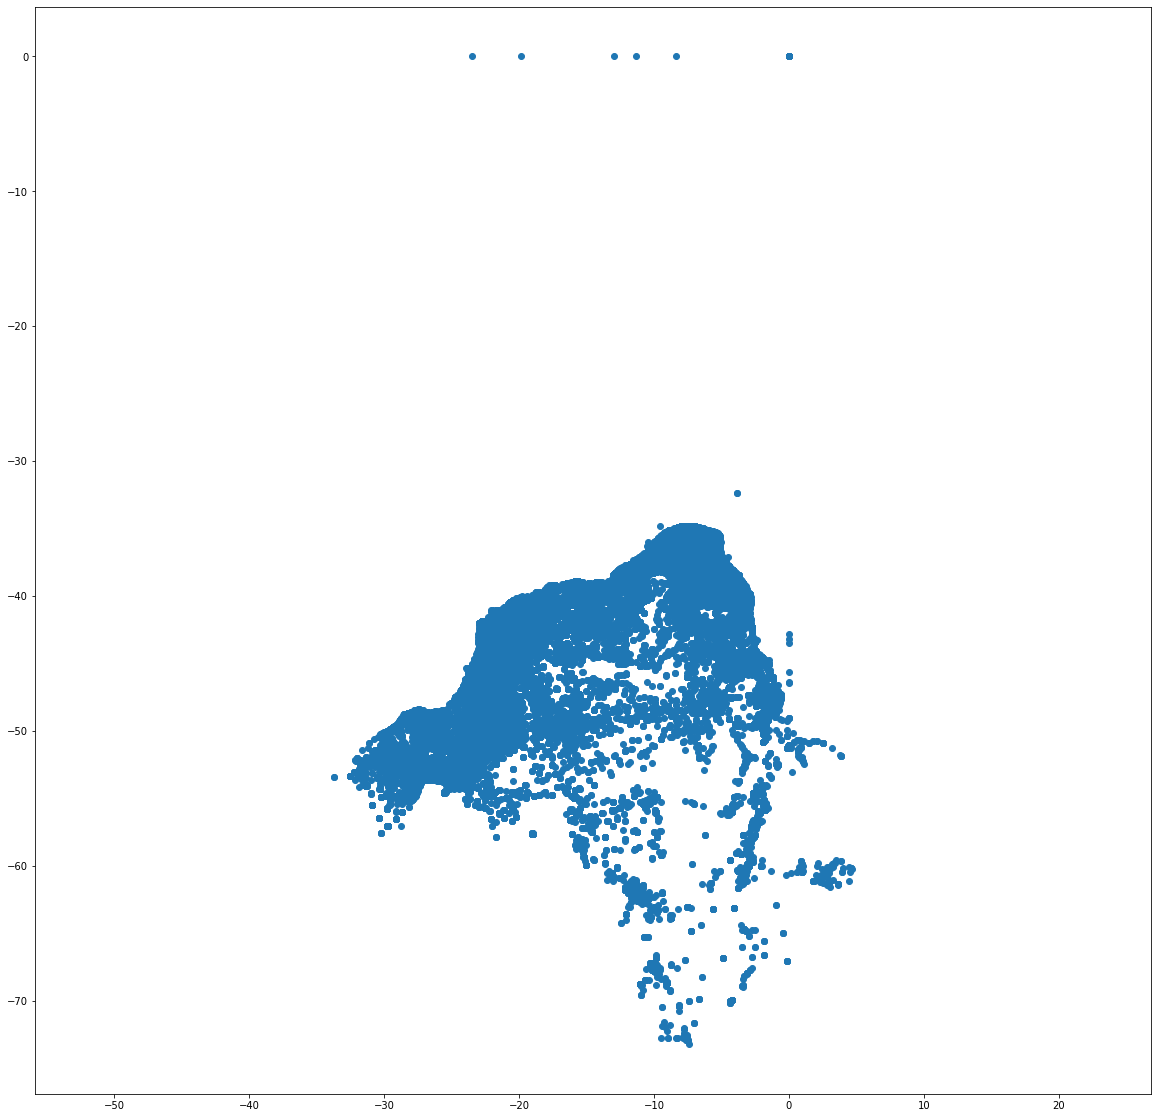

In [113]:
plt.figure(figsize=(20, 20))
plt.axis('equal')
plt.scatter(df_ubs.latitude, df_ubs.longitude)

In [114]:
import re

df_renda = pd.read_excel('renda_per_capita.xlsx')
df_renda.renda = df_renda.renda.apply(lambda x: re.sub('[^0-9]', '', x))
df_renda.sample(2)

,unidade,renda
15,Sergipe,1028
2,Rio Grande do Sul,1759


In [115]:
df_renda.renda = df_renda.renda.astype('int16')


In [116]:
df_ufs1 = pd.read_excel('ufs.xlsx')

In [117]:
df_ufs1.drop('cod', axis=1, inplace=True)

In [118]:
df_renda.unidade = df_renda.unidade.apply(lambda x: x.replace('\xa0', ''))

In [121]:
df_renda.iloc[2,2] = 'RS'
df_renda.iloc[22,0] = 'Pará'
df_renda.iloc[22,2] = 'PA'
df_renda.iloc[17,0] = 'Bahia'
df_renda.iloc[17,2] = 'BA'

In [ ]:
df_renda = df_renda.join(df_ufs1.set_index('nome'), on='unidade')
df_renda

In [123]:
df_renda.drop('unidade', axis=1, inplace=True)

In [ ]:
df_ubs_x_estado = df_ubs_x_estado.join(df_renda.set_index('uf'), on='uf')

In [128]:
df_ubs_x_estado.columns = ['uf', 'ubs', 'renda_per_capita']
df_ubs_x_estado

,uf,ubs,renda_per_capita
0,MG,5595,1314
1,SP,5383,1814
2,BA,3960,965
3,PE,2590,897
4,CE,2205,1028
5,RS,2117,1759
6,PR,2115,1508
7,MA,2050,676
8,RJ,1992,1723
9,SC,1779,1632


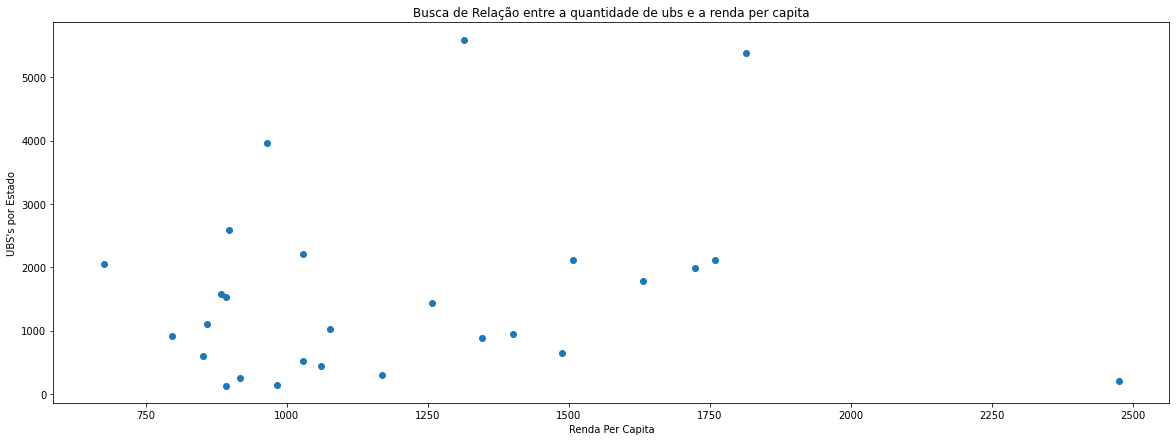

In [137]:
# Cálculo de relação entre a quantidade de ubs e a renda per capita
plt.figure(figsize=(20,7))
plt.title('Busca de Relação entre a quantidade de ubs e a renda per capita')
plt.xlabel('Renda Per Capita')
plt.ylabel("UBS's por Estado")
plt.scatter(y=df_ubs_x_estado.ubs, x=df_ubs_x_estado.renda_per_capita)

**Não há uma relação claramente definida, todavia parece que os Estados com uma menor renda per capita tendem a possuir uma quantidade maior de UBS's. Talvez porque a população tenha menores condições de contar com a rede particular de saúde.**